In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

In [2]:
dchi = 0.05
dtau = 0.05

nchi = int(2//dchi)
ntau = int(3//dtau)

chis = dchi*np.arange(nchi)
taus = dtau*np.arange(ntau)

# n = 1
We should find an analytical solution of the equation
$$
\cfrac{\partial\lambda}{\partial\tau} + \cfrac{\partial\lambda}{\partial\tau} = \nu(\tau, \chi)
$$

Where there are inintial and border constraints:
1. $\lambda(\tau, 0) = 0$
2. $\lambda(0, \chi) = \phi(\chi)$

## Linear $\nu$

Let $\nu(\tau, \chi)$ be like
$$
    \nu(\tau, \chi) = a\tau + b\chi + c
$$

Let's write characteristic equations:
$$
\cfrac{d\chi}{1} = \cfrac{d\tau}{1} = \cfrac{d\lambda}{a\tau + b\chi + c}
$$


Solving the equation 
$$d\chi = d\tau$$
we will get: 
$$c_1 = \chi - \tau$$

Solving the equation
$$d(a\tau + b\chi) = \cfrac{(a + b) d\lambda}{a\tau + b\chi + c}$$
we will get: 
$$c_2 = \cfrac{1}{2}(a\tau + b\chi)^2 + c(a\tau + b\chi) - (a + b)\lambda$$

1. $\lambda(\tau, 0) = 0$
$$
\begin{cases}
\chi = 0 \\
\lambda = 0 \\
c_1 = \chi - \tau \\
c_2 = \cfrac{1}{2}(a\tau + b\chi)^2 + c(a\tau + b\chi) - (a + b)\lambda \\
F_1(c_1, c_2) = 0
\end{cases}
$$

In this case $c_1 = -\tau$, $c_2 = \cfrac{a^2}{2}\tau^2 + ac\tau$. So $F_1$ can be represented as
$$
F_1(c_1, c_2) = c_2 - \cfrac{a^2}{2}c_1^2 + ac\cdot c_1
$$
$$
F_1(\tau, \chi, \lambda) = 
(a^2 + ab)\cdot\tau\chi + \cfrac{b^2-a^2}{2}\cdot\chi^2 + (a+b)c\cdot\chi - (a + b)\lambda
$$

Cause $F_1(\tau, \chi, \lambda) = 0$ we can represent $\lambda$:
$$
\lambda(\tau, \chi) = \cfrac{b-a}{2}\cdot\chi^2 + a\cdot\chi\tau + c\cdot\chi
$$

And now we can define $\phi(\chi)$:
$$
\phi(\chi) =
\lambda(0, \chi) = \cfrac{b-a}{2}\cdot\chi^2 + c\cdot\chi
$$

In [3]:
def nu_lintype(tau, chi, a=1, b=1, c=1):
    return a*tau + b*chi + c

def lambda_anal_lintype_n1(tau, chi, a=1, b=1, c=1):
    return 0.5*(b - a)*chi**2 + a*chi*tau + c*chi

def phi_lintype_n1(chi, a=1, b=1, c=1):
    return 0.5*(b - a)*chi*chi + c*chi

/tmp/ipykernel_22839/2999392764.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


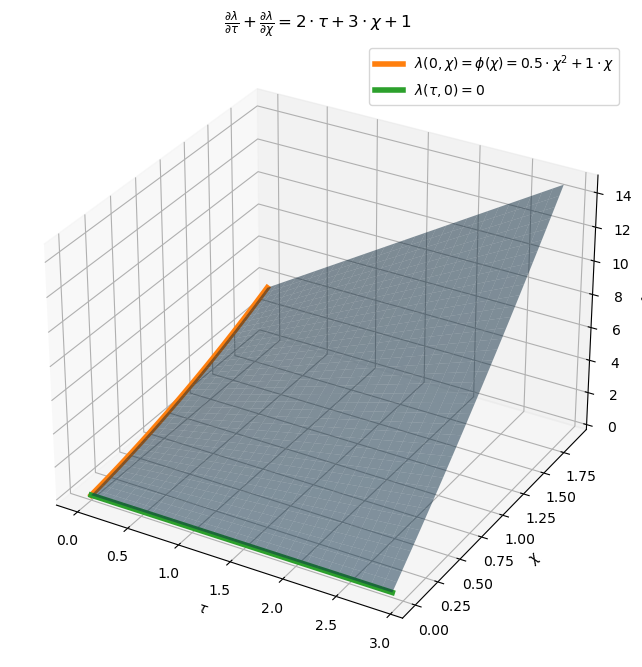

In [4]:
a, b, c, = 2, 3, 1

tau_space = np.ones([ntau, nchi])*taus.reshape([ntau, 1])
chi_space = np.ones([ntau, nchi])*chis.reshape([1, nchi])

solution = lambda_anal_lintype_n1(tau_space, chi_space, a=a, b=b, c=c)
initial = phi_lintype_n1(chis, a=a, b=b, c=c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.set_figheight(8)
fig.set_figwidth(10)

nu_str = f'{a}\\cdot\\tau + {b}\\cdot\\chi + {c}'
phi_str = f'{0.5*(b - a)}\\cdot\\chi^2 + {c}\\cdot\\chi'
title = r'$\frac{\partial\lambda}{\partial\tau} + \frac{\partial\lambda}{\partial\chi} = ' + nu_str + '$'

ax.set_title(title)
ax.plot_surface(tau_space, chi_space, solution, alpha=0.5)
ax.plot(0*chis, chis, initial, label=r'$\lambda(0, \chi) = \phi(\chi) = ' + phi_str + '$', linewidth=4)
ax.plot(taus, 0*taus, 0*taus, label=r'$\lambda(\tau, 0) = 0$', linewidth=4)

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')

ax.legend()

fig.show()

## Exponential $\nu$

Let $\nu(\tau, \chi)$ be like
$$
    \nu(\tau, \chi) = e^{a\tau + b\chi + \ln c} = c\cdot e^{a\tau + b\chi}
$$

Let's write characteristic equations:
$$
\cfrac{d\chi}{1} = \cfrac{d\tau}{1} = \cfrac{d\lambda}{c\cdot e^{a\tau + b\chi}}
$$

Solving the equation 
$$d\chi = d\tau$$
we will get: 
$$c_1 = \chi - \tau$$

Solving the equation 
$$ad\tau + bd\chi = (a + b)\cfrac{d\lambda}{e^{a\tau + b\chi}}$$
we will get: 
$$c_2 = e^{a\tau + b\chi} - \cfrac{a = b}{c}\lambda$$

1. $\lambda(\tau, 0) = 0$
$$
\begin{cases}
\chi = 0 \\
\lambda = 0 \\
c_1 = \chi - \tau \\
c_2 = c_2 = e^{a\tau + b\chi} - \cfrac{a = b}{c}\lambda \\
F_1(c_1, c_2) = 0
\end{cases}
$$

In this case $c_1 = -\tau$, $c_2 = e^{a\tau}$. So $F_1$ can be represented as
$$
F_1(c_1, c_2) = c_2 - e^{-a\cdot c_1}
$$
$$
F_1(\tau, \chi, \lambda) = e^{a\tau + b\chi} - e^{a\tau - a\chi} - \cfrac{a + b}{c}\lambda
$$

Cause $F_1(\tau, \chi, \lambda) = 0$ we can represent $\lambda$:
$$
\lambda = \cfrac{c}{a + b}(e^{a\tau + b\chi} - e^{a\tau - a\chi})
$$


And now we can define $\phi(\chi)$:
$$
\phi(\chi) =
\lambda(0, \chi) = \cfrac{c}{a + b}(e^{b\chi} - e^{- a\chi})
$$


In [5]:
def nu_exptype(tau, chi, a=1, b=1, c=1):
    return c*np.exp(a*tau + b*chi)

In [6]:
def lambda_anal_exptype_n1(tau, chi, a=1, b=1, c=1):
    return c/(a + b)*(np.exp(a*tau + b*chi) - np.exp(a*tau - a*chi))

In [7]:
def phi_exptype(chi, a=1, b=1, c=1):
    return c/(a + b)*(np.exp(b*chi) - np.exp(-a*chi))

/tmp/ipykernel_22839/994138461.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


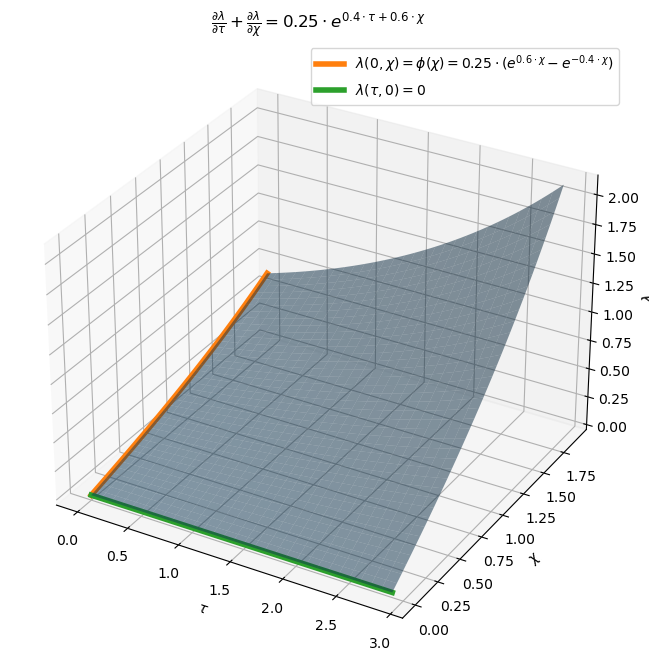

In [8]:
a, b, c, = 0.4, 0.6, 0.25

tau_space = np.ones([ntau, nchi])*taus.reshape([ntau, 1])
chi_space = np.ones([ntau, nchi])*chis.reshape([1, nchi])

solution = lambda_anal_exptype_n1(tau_space, chi_space, a=a, b=b, c=c)
initial = phi_exptype(chis, a=a, b=b, c=c)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.set_figheight(8)
fig.set_figwidth(8)

nu_str = f'{c}\\cdot e^' + '{' + str(a) + r'\cdot\tau' + ' + ' + str(b) + r'\cdot\chi' + '}'
phi_str = f'{c/(a+b)}\\cdot(e^' + '{' + f'{b}\\cdot\\chi' +  '} - e^{' + f'{-a}\\cdot\\chi' + '})'
title = r'$\frac{\partial\lambda}{\partial\tau} + \frac{\partial\lambda}{\partial\chi} = ' + nu_str + '$'

ax.set_title(title)
ax.plot_surface(tau_space, chi_space, solution, alpha=0.5)
ax.plot(0*chis, chis, initial, label=r'$\lambda(0, \chi) = \phi(\chi) = ' + phi_str + '$', linewidth=4)
ax.plot(taus, 0*taus, 0*taus, label=r'$\lambda(\tau, 0) = 0$', linewidth=4)


ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')

ax.legend()

fig.show()

# n = 2
We should find an analytical solution of the equation
$$
\cfrac{\partial\lambda}{\partial\tau} + (\cfrac{\partial\lambda}{\partial\chi})^2 = \nu(\tau, \chi)
$$

Where there are inintial and border constraints:
1. $\lambda(\tau, 0) = 0$
2. $\lambda(0, \chi) = \phi(\chi)$

## $\nu(\tau, \chi) = f(\tau) + g(\chi)$

There is a [solution](https://eqworld.ipmnet.ru/en/solutions/fpde/fpde3103.pdf) for equations like this:
$$
\lambda(\tau, \chi) = -c_1\tau + \int\limits_0^\tau f(t)dt + \int\limits_0^\chi\sqrt{g(x) + c_1}dx + c_2
$$

In [9]:
def lambda_anal_n2(tau, chi, 
                   nu=lambda t, x: t+x, 
                   c1=0, c2=0):
    # nu(tau, chu) should be represented as sum f(tau) + g(chi)
    f = lambda t: nu(t, 0) - 0.5*nu(0, 0)
    g = lambda x: nu(0, x) - 0.5*nu(0, 0)
    root_gc1 = lambda x: (g(x) + c1)**0.5
    return -c1*tau + sp.integrate.quad(f, 0, tau)[0] + sp.integrate.quad(root_gc1, 0, chi)[0] + c2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_22839/2621199675.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


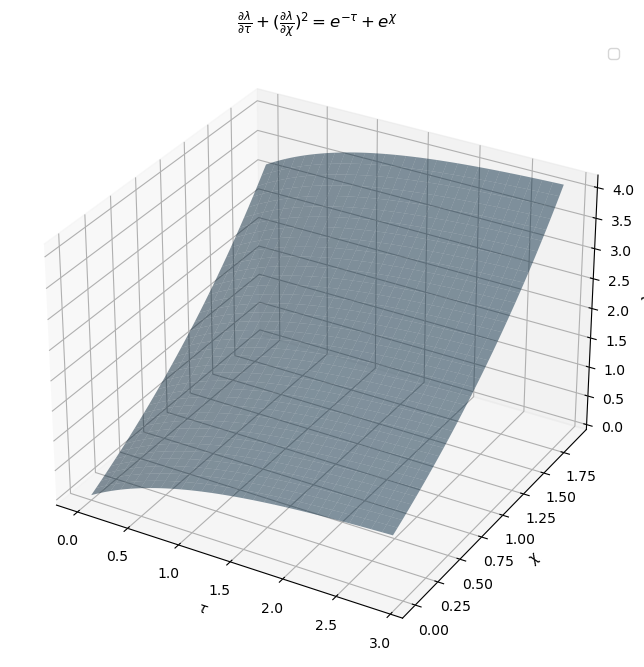

In [10]:
nu = lambda tau, chi: np.exp(-tau) + np.exp(chi)
nu_str = r'e^{-\tau} + e^\chi'

tau_space = np.ones([ntau, nchi])*taus.reshape([ntau, 1])
chi_space = np.ones([ntau, nchi])*chis.reshape([1, nchi])

solution = np.array([[lambda_anal_n2(tau_space[j, k], chi_space[j, k], nu)
                      for k in range(nchi)] for j in range(ntau)])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.set_figheight(8)
fig.set_figwidth(8)

ax.set_title(r'$\frac{\partial\lambda}{\partial\tau} + (\frac{\partial\lambda}{\partial\chi})^2 = ' + nu_str + '$')
ax.plot_surface(tau_space, chi_space, solution, alpha=0.5)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')

ax.legend()

fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_22839/227141810.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


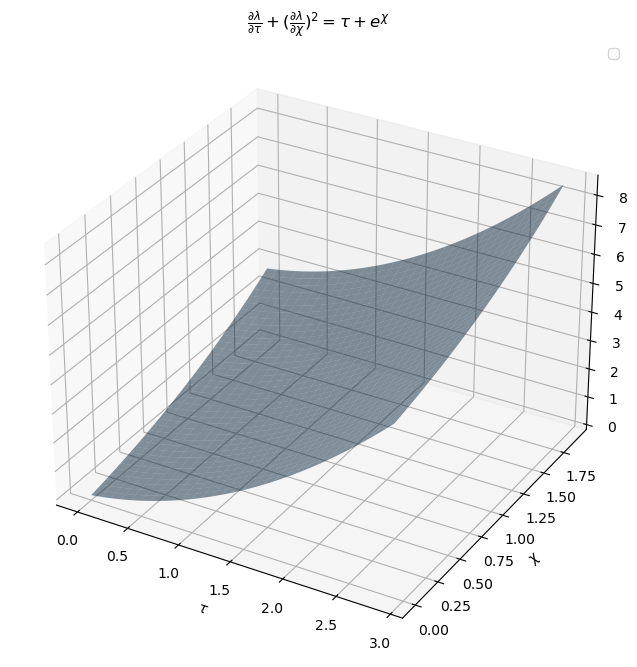

In [11]:
nu = lambda tau, chi: tau + np.exp(chi)
nu_str = r'\tau + e^\chi'

tau_space = np.ones([ntau, nchi])*taus.reshape([ntau, 1])
chi_space = np.ones([ntau, nchi])*chis.reshape([1, nchi])

solution = np.array([[lambda_anal_n2(tau_space[j, k], chi_space[j, k], nu)
                      for k in range(nchi)] for j in range(ntau)])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

fig.set_figheight(8)
fig.set_figwidth(8)

ax.set_title(r'$\frac{\partial\lambda}{\partial\tau} + (\frac{\partial\lambda}{\partial\chi})^2 = ' + nu_str + '$')
ax.plot_surface(tau_space, chi_space, solution, alpha=0.5)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\chi$')
ax.set_zlabel(r'$\lambda$')

ax.legend()

fig.show()